<a href="https://colab.research.google.com/github/FloraAmato/Lezioni/blob/main/classificazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image
from matplotlib import pyplot

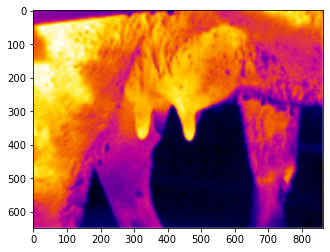

In [ ]:
image = plt.imread('C:/Users/Ernesto Esposito/Desktop/foto bufale/524/280.png')
pyplot.imshow(image)
pyplot.show()

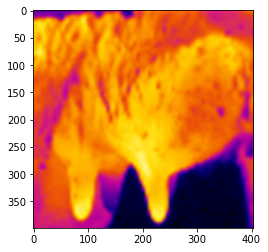

In [ ]:
image = plt. imread('C:/Users/Ernesto Esposito/Desktop/dataset2/train/NessunaInfezione/nf13.png')
pyplot.imshow(image)
pyplot.show()

In [ ]:
import numpy as np 
import tensorflow as tf #versione 2.4.1
import pandas as pd 
import os


from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
from tensorflow.keras.models import Sequential

In [ ]:
for k in range(20):
    dirnf = "C:/Users/Ernesto Esposito/Desktop/dataset2/train/NessunaInfezione/nf"
    i = load_img(dirnf + str(k) + '.png')
    x = img_to_array(i)
    x = x.reshape((1,) + x.shape)
    imgGen = ImageDataGenerator(horizontal_flip = True)
    j = 0
    dir_NF = "C:/Users/Ernesto Esposito/Desktop/dataset2/train/NessunaInfezione"
    for batch in imgGen.flow(x, batch_size=1, save_to_dir=dir_NF, save_format='png', save_prefix='horiz_nf'+str(k)):
        j+=1
        if j>0:
            break

for k in range(20):
    dirpf = "C:/Users/Ernesto Esposito/Desktop/dataset2/train/ProbabileInfezione/pf"
    i = load_img(dirpf + str(k) + '.png')
    x = img_to_array(i)
    x = x.reshape((1,) + x.shape)
    imgGen = ImageDataGenerator(horizontal_flip = True)
    j = 0
    dir_PF = "C:/Users/Ernesto Esposito/Desktop/dataset2/train/ProbabileInfezione"
    for batch in imgGen.flow(x, batch_size=1, save_to_dir=dir_PF, save_format='png', save_prefix='horiz_nf'+str(k)):
        j+=1
        if j>0:
            break

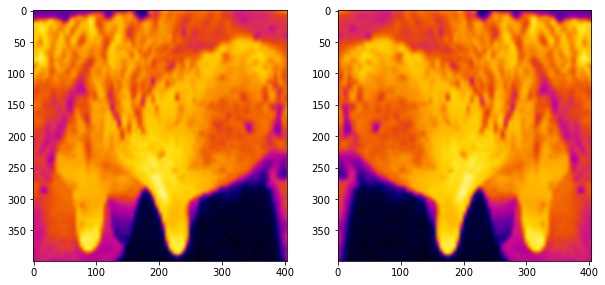

In [ ]:
plt.figure(figsize=(10, 10)) 
plt.subplot(121)
image = plt.imread('C:/Users/Ernesto Esposito/Desktop/dataset2/train/NessunaInfezione/nf13.png')
pyplot.imshow(image)

plt.subplot(122)
image = plt.imread('C:/Users/Ernesto Esposito/Desktop/dataset2/train/NessunaInfezione/horiz_nf13_0_3311.png')
pyplot.imshow(image)

In [ ]:
base_dir = "C:/Users/Ernesto Esposito/Desktop/dataset2"

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
train_nf = os.path.join(train_dir, 'NessunaInfezione')  
train_pf = os.path.join(train_dir, 'ProbabileInfezione')  
validation_nf = os.path.join(validation_dir, 'NessunaInfezione')  
validation_pf = os.path.join(validation_dir, 'ProbabileInfezione')

In [ ]:
num_nf_tr = len(os.listdir(train_nf))
num_pf_tr = len(os.listdir(train_pf))

num_nf_val = len(os.listdir(validation_nf))
num_pf_val = len(os.listdir(validation_pf))

total_train = num_nf_tr + num_pf_tr
total_val = num_nf_val + num_pf_val

print('Totale di immagini NessunaInfezione nel train:', num_nf_tr)
print('Totale di immagini ProbabileInfezione nel train:', num_pf_tr)

print('Totale di immagini NessunaInfezione nel validation:', num_nf_val)
print('Totale di immagini ProbabileInfezione nel validation:', num_pf_val)
print("--------------")
print("Totale immagini train:", total_train)
print("Totale immagini validation:", total_val)

Totale di immagini NessunaInfezione nel train: 26
Totale di immagini ProbabileInfezione nel train: 26
Totale di immagini NessunaInfezione nel validation: 7
Totale di immagini ProbabileInfezione nel validation: 7
--------------
Totale immagini train: 52
Totale immagini validation: 14


In [ ]:
BATCH_SIZE=5 
IMG_SHAPE  = 180 

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory( 
  train_dir,
  seed=24,
  image_size=(IMG_SHAPE,IMG_SHAPE),
  batch_size=BATCH_SIZE)

Found 52 files belonging to 2 classes.


In [ ]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory( 
  validation_dir,
  seed=6,
  image_size=(IMG_SHAPE,IMG_SHAPE), 
  batch_size=BATCH_SIZE)

Found 14 files belonging to 2 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['NessunaInfezione', 'ProbabileInfezione']


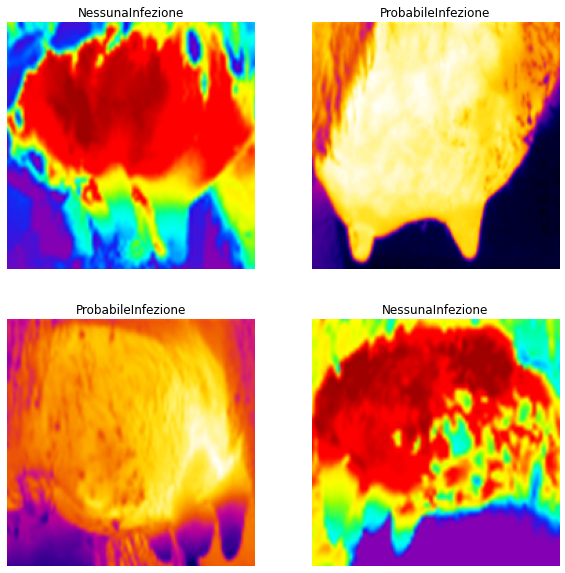

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
      ax = plt.subplot(2, 2, i + 1) 
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off") 

In [ ]:
num_classes = 2

model = Sequential([
 
  layers.Conv2D(16, (3,3), padding='same', activation='relu',
                input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(), 
  layers.Dense(128, activation='relu'), 
  layers.Dense(num_classes)
])

model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit_generator(
    train_ds,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=validation_ds,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i] 
  plt.grid(False) 
  plt.xticks([]) 
  plt.yticks([]) 
  plt.imshow(img.numpy().astype("uint8")) 

  predicted_label = np.argmax(predictions_array)
  
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
   
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
for imagess, labelss in train_ds.take(1):
    predictions = probability_model.predict(images)

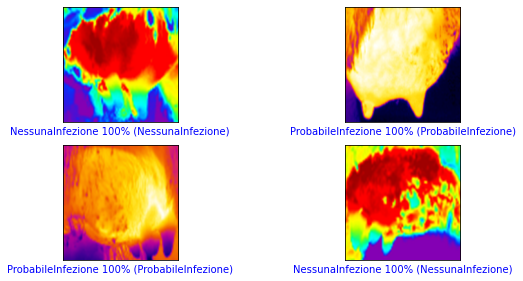

In [ ]:
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols 
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], labels, images)      

plt.tight_layout()
plt.show()

In [ ]:
predictions_val = probability_model.predict(val_images)

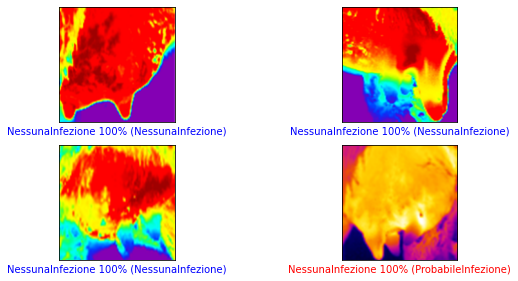

In [ ]:
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols 
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_val[i],val_labels,val_images)      

plt.tight_layout()
plt.show()